In [2]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
tk = th.Thicket.from_caliperreader(glob("28-cali/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 39/39 [00:00<00:00, 40.72it/s]


In [5]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

4.182 main
├─ 2.609 main
│  ├─ 0.885 comm_large
│  │  ├─ 0.864 mpi_recv
│  │  └─ 0.367 mpi_send
│  ├─ 1.701 comp_large
│  ├─ 0.758 correctness_check
│  └─ 0.719 data_init_runtime
└─ 1.567 mpi_init

Legend (Metric: Avg time/rank Min: 0.37 Max: 4.18 indices: {'profile': 130396779})
█ 3.80 - 4.18
█ 3.04 - 3.80
█ 2.27 - 3.04
█ 1.51 - 2.27
█ 0.75 - 1.51
█ 0.37 - 0.75

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [8]:
def plot_mpl(df, title, xlabel, col):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    labels = df['input_type'].unique()
    for label in labels:
        subset = df[df['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        ax.plot(subset['num_procs'], subset[col], marker='o', label=label+' '+col[0:3])

        
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(col)
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    return fig, ax

In [9]:
def plot_variance(df, title, xlabel, ylabel):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    labels = df['input_type'].unique()
    for label in labels:
        subset = df[df['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        ax.plot(subset['num_procs'], subset['Variance time/rank'], marker='o', label=label)

        
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    return fig, ax

In [5]:
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              130396779   1.0   
                                                  162888805   1.0   
                                                  178651413   1.0   
                                                  270699525   1.0   
                                                  291167253   1.0   
                                                  454734613   1.0   
                                                  465844449   1.0   
                                                  550278755   1.0   
                                                  677984668   1.0   
                                                  712462718   1.0   
                                                  726898555   1.0   
                                                  732478269   1.0   
                                                  739740928   1.0   
                                                  791032117   1.0   
                                                  835848702   1.0   
                                                  904388236   1.0   
                                                  1088873340  1.0   
                                                  1203588940  1.0   
                                                  1860767312  1.0   
                                                  2306447753  1.0   
                                                  2313282652  1.0   
                                                  2539215497  1.0   
                                                  2753050578  1.0   
                                                  3082593157  1.0   
                                                  3388276648  1.0   
                                                  3407093663  1.0   
                                                  3475722897  1.0   
                                                  3514672052  1.0   
                                                  3612537846  1.0   
                                                  3612949622  1.0   
                                                  3712586259  1.0   
                                                  3732379677  1.0   
                                                  3857247240  1.0   
                                                  3910304852  1.0   
                                                  3948698908  1.0   
                                                  4081023930  1.0   
                                                  130396779   3.0   
                                                  162888805   3.0   
                                                  178651413   3.0   
                                                  270699525   3.0   
                                                  291167253   3.0   
                                                  454734613   3.0   
                                                  465844449   3.0   
                                                  550278755   3.0   
                                                  677984668   3.0   
                                                  712462718   3.0   
                                                  726898555   3.0   
                                                  732478269   3.0   
                                                  739740928   3.0   
                                                  791032117   3.0   
                                                  835848702   3.0   
                                                  904388236   3.0   
                                                  1088873340  3.0   
                                                  1203588940  3.0   
                                                  1860767312  3.0   
                                                  2306447753  3.0   
                                                  2313282652

In [10]:
node_indices = tk.get_node("main")
print(node_indices)  # Inspect what this returns

[Node({'name': 'main', 'type': 'function'}), Node({'name': 'main', 'type': 'function'})]


In [11]:
 # Access the Adiak metadata associated with a specific node in the call tree
print(tk.metadata.columns)
array_types = tk.metadata["input_type"]
num_procs = tk.metadata['num_procs'] + 1

Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:region.count', 'spot:time.exclusive', 'launchdate', 'libraries',
       'cmdline', 'cluster', 'algorithm', 'programming_model', 'data_type',
       'size_of_data_type', 'input_size', 'input_type', 'num_procs',
       'scalability', 'group_num', 'implementation_source'],
      dtype='object')


In [12]:
main_time = tk.dataframe.loc[tk.get_node("main")[0], ["Min time/rank","Max time/rank","Avg time/rank", "Total time"]]
# print(main_time)
main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
variance = ((main_time['Max time/rank'] - main_time['Avg time/rank'])**2 + 
                            (main_time['Min time/rank'] - main_time['Avg time/rank'])**2) / 2

variance_main_time = pd.DataFrame({
    'input_type': main_time['input_type'], 
    'num_procs': main_time['num_procs'],
    'Variance time/rank': variance
})

In [39]:
nodes = tk.dataframe.loc[tk.get_node("main")[0]]
nodes.shape

(40, 15)

In [37]:
def plot_all(df_section, df_var, title):

    plot_mpl(
        df=df_section,
        title=f"Min {title} for 2^28 array size",
        xlabel="num_procs",
        col="Min time/rank"
    )
    plot_mpl(
        df=df_section,
        title=f"Avg {title} for 2^28 array size",
        xlabel="num_procs",
        col="Avg time/rank"
    )
    plot_mpl(
        df=df_section,
        title=f"Max {title} for 2^28 array size",
        xlabel="num_procs",
        col="Max time/rank"
    )
    plot_variance(
        df=df_var,
        title=f"Variance for {title} for 2^28 array size",
        xlabel="num_procs",
        ylabel="Variance time/rank",
    )


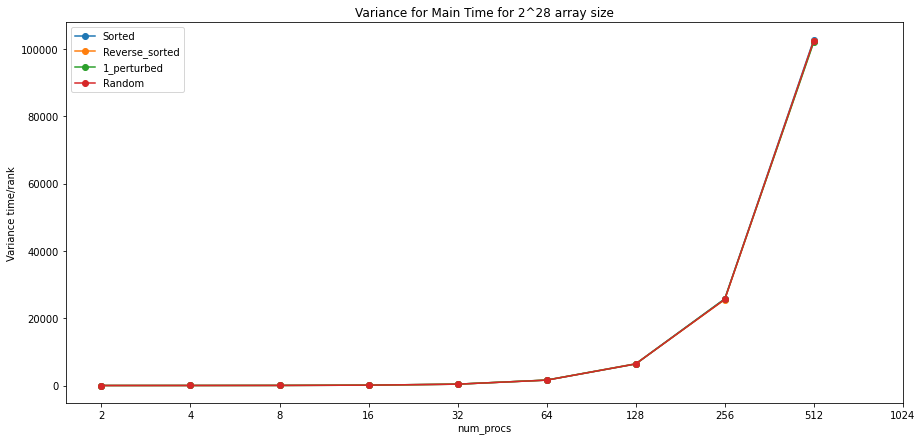

(<Figure size 1080x504 with 1 Axes>,
 <Axes: title={'center': 'Variance for Main Time for 2^28 array size'}, xlabel='num_procs', ylabel='Variance time/rank'>)

In [40]:
comm_time = tk.dataframe.loc[tk.get_node("comp_large"), ["Min time/rank","Max time/rank","Avg time/rank", "Total time"]]
# print(main_time)
comm_time = pd.merge(comm_time, array_types, on="profile").merge(num_procs, on="profile")
variance = ((comm_time['Max time/rank'] - comm_time['Avg time/rank'])**2 + 
                            (comm_time['Min time/rank'] - comm_time['Avg time/rank'])**2) / 2

var_comm_time = pd.DataFrame({
    'input_type': comm_time['input_type'], 
    'num_procs': comm_time['num_procs'],
    'Variance time/rank': variance
})

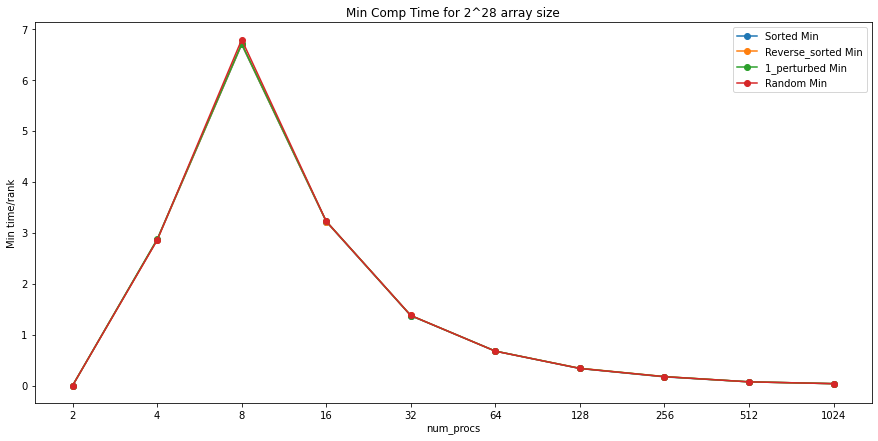

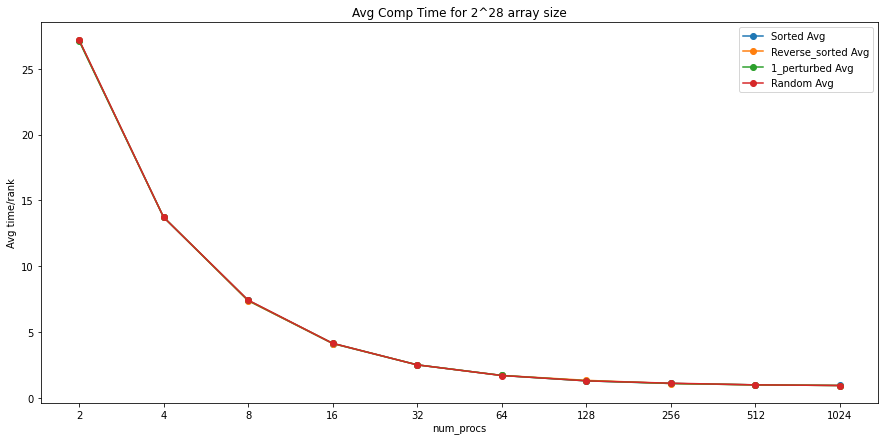

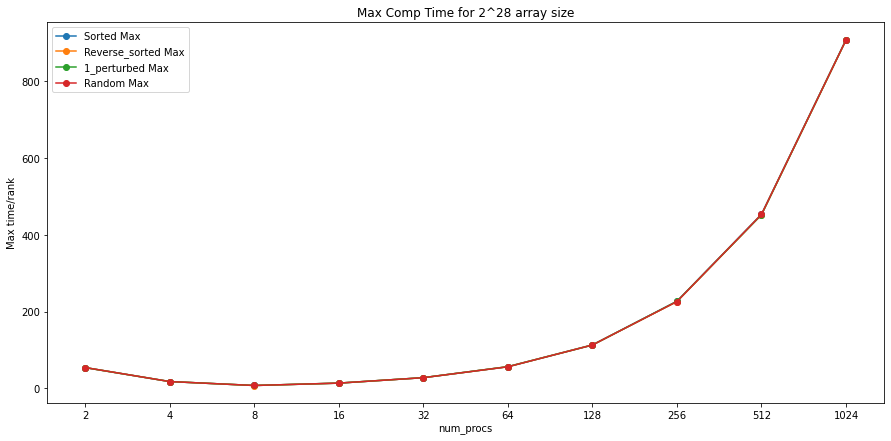

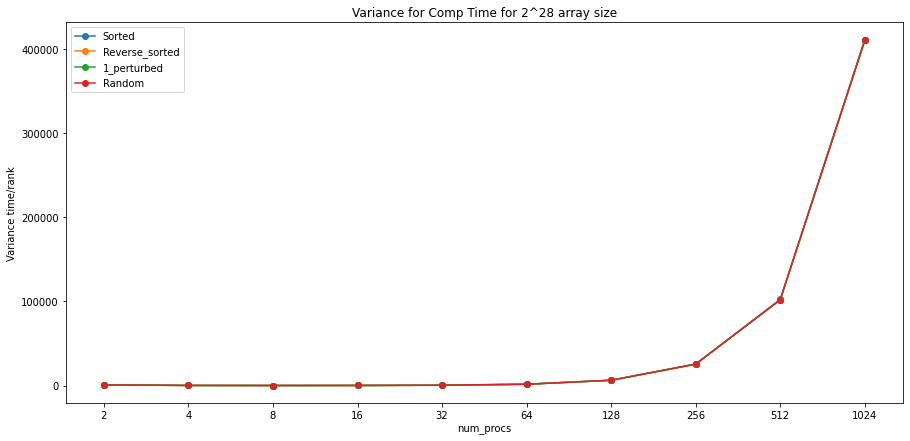

In [41]:
plot_all(comm_time, var_comm_time, 'Comp Time')